In [1]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.4 MB/s eta 0:00:00


In [2]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,Concatenate

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras import optimizers

In [5]:
import tensorflow
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten, BatchNormalization,AveragePooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from keras import initializers

from keras.utils import to_categorical
from keras.layers.core import Activation

In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import math

In [7]:
data_path6 = '/content/drive/MyDrive/Codigo_Nata/AlzheimerCodesDatosPlanos/BasesDeDatos/ADNI/ADNIMERGE.csv'
figures_path = './figures'
Data = pd.read_csv(data_path6)

In [8]:
if not os.path.exists(figures_path):
    os.makedirs(figures_path)
if not os.path.exists(figures_path+"/6FP"):
    os.makedirs(figures_path+"/6FP")


In [9]:
df=Data[["AGE","PTGENDER","PTEDUCAT", "PTMARRY","APOE4",
        "ADAS11","ADAS13","ADASQ4","MMSE","FAQ", "MOCA",
        "CDRSB","RAVLT_immediate","RAVLT_learning","RAVLT_forgetting",
        "RAVLT_perc_forgetting","LDELTOTAL", "TRABSCOR","mPACCdigit"
        ,"mPACCtrailsB","Ventricles", "Hippocampus","WholeBrain", "Entorhinal",
        "Fusiform", "MidTemp", "ICV","DX_bl"]]

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
LabelEncoder_1=LabelEncoder()
df["PTGENDER"]=LabelEncoder_1.fit_transform(df["PTGENDER"])
LabelEncoder_1=LabelEncoder()
df["PTMARRY"]=LabelEncoder_1.fit_transform(df["PTMARRY"])

In [12]:
df=df.dropna()

In [13]:
df.drop(df[df['DX_bl']=="SMC"].index,inplace=True)
df.drop(df[df['DX_bl']=="LMCI"].index,inplace=True)

In [14]:
Labels = df['DX_bl'].values
Features = df.drop(['DX_bl'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)

Features shape: (1401, 27)
Labels shape: (1401,)


In [15]:
for i in range(len(Labels)):
  if Labels[i]=="EMCI":
    Labels[i]=0
  if Labels[i]=="CN":
    Labels[i]=1

  if Labels[i]=="AD":
    Labels[i]=2

In [16]:
LabelDataFrame=pd.DataFrame(Labels)

In [17]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [18]:
LabelDataFrame[0].value_counts()

0    696
1    583
2    122
Name: 0, dtype: int64

In [19]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
       # model.save('modeloEpilepsia.h5')
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        clc=classification_report(y_test, y_pred)
        print(clc)
        print('accuracy_score: {0:.4f}'.format(acc_score))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, stratify=Labels, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (1120, 27)
Train labels shape: (1120,)
Test data shape: (281, 27)
Test labels shape: (281,)


In [21]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(1120, 27)

In [23]:
X_train=np.expand_dims(X_train, axis=-1)
X_test=np.expand_dims(X_test, axis=-1)

In [24]:
X_train.shape

(1120, 27, 1)

In [25]:
#classes
classes = [0, 1, 2]

In [26]:
y_train[:].dtype

dtype('O')

In [27]:
y_test[:].dtype

dtype('O')

In [28]:
from sklearn.utils.multiclass import type_of_target
target_type = type_of_target(y_train[:])
print("Type of target:", target_type)

Type of target: unknown


In [29]:
y_train= y_train[:].astype(int)

In [30]:
type_of_target(y_train)

'multiclass'

In [31]:
y_test=y_test[:].astype(int)

In [32]:
type_of_target(y_test)

'multiclass'

## Transformer

In [33]:

# OPTIMIZER
LEARNING_RATE_2 = 1e-3
WEIGHT_DECAY_2 = 1e-4
LAYER_NORM_EPS_2 = 1e-6
PROJECTION_DIM_2 = 256 # no se puede modificar
NUM_HEADS_2 = 4
NUM_LAYERS_2 = 2
MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation="selu")(x)
        x = layers.Dropout(dropout_rate)(x)
    return x
def transformer_2(encoded_patches):

    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)

    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)

    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)

    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches

def Transform_sh_2(inputs):
      # Iterate over the number of layers and stack up blocks of
      # Transformer.
    for i in range(NUM_LAYERS_2):
          # Add a Transformer block.
        encoded_patches = transformer_2(inputs)

    return encoded_patches

## CapsNet

In [34]:
from keras.layers import GlobalAveragePooling2D,ReLU
num_clases=3
vec=16
class DigitCapsuleLayer(Layer):
    # creating a layer class in keras
    def __init__(self, **kwargs):
        super(DigitCapsuleLayer, self).__init__(**kwargs)
        self.kernel_initializer = initializers.get('glorot_uniform')

    def build(self, input_shape):
        # initialize weight matrix for each capsule in lower layer
        self.W = self.add_weight(shape = [1,1,num_clases, vec, 256], initializer = self.kernel_initializer, name = 'weights')
        self.built = True

    def call(self, inputs):

        u = tf.reshape(inputs, (-1, 1, 256)) # u.shape: (None, 1152, 8)
        u = tf.expand_dims(u, axis=-2) # u.shape: (None, 1152, 1, 8)
        u = tf.expand_dims(u, axis=-1) # u.shape: (None, 1152, 1, 8, 1)
        u_hat = tf.matmul(self.W, u) # u_hat.shape: (None, 1152, 10, 16, 1)
        u_hat = tf.squeeze(u_hat, [4]) # u_hat.shape: (None, 1152, 10, 16)
        b = tf.zeros(shape = [K.shape(inputs)[0],2, num_clases, 1])

# routing algorithm with updating coupling coefficient c, using scalar product b/w input capsule and output capsule
        for i in range(3-1):
            c = tf.nn.softmax(b, axis=-2) # c.shape: (None, 1152, 10, 1)
            s = tf.reduce_sum(tf.multiply(c, u_hat), axis=1, keepdims=True) # s.shape: (None, 1, 10, 16)
            v = squash(s) # v.shape: (None, 1, 10, 16)
            agreement = tf.squeeze(tf.matmul(tf.expand_dims(u_hat, axis=-1), tf.expand_dims(v, axis=-1), transpose_a=True), [4]) # agreement.shape: (None, 1152, 10, 1)
            # Before matmul following intermediate shapes are present, they are not assigned to a variable but just for understanding the code.
            # u_hat.shape (Intermediate shape) : (None, 1152, 10, 16, 1)
            # v.shape (Intermediate shape): (None, 1, 10, 16, 1)
            # Since the first parameter of matmul is to be transposed its shape becomes:(None, 1152, 10, 1, 16)
            # Now matmul is performed in the last two dimensions, and others are broadcasted
            # Before squeezing we have an intermediate shape of (None, 1152, 10, 1, 1)
            b += agreement

        return v

    def compute_output_shape(self, input_shape):
        return tuple([None, num_clases, vec])

epsilon = 1e-7

def output_layer(inputs):
    return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())

def squash(inputs):
    # take norm of input vectors
    squared_norm = tf.keras.backend.sum(tf.keras.backend.square(inputs), axis = -1, keepdims = True)

    # use the formula for non-linear function to return squashed output
    return ((squared_norm/(1+squared_norm))/(K.sqrt(squared_norm+K.epsilon())))*inputs

def safe_norm(v, axis=-1, epsilon=1e-7):
    v_ = tf.reduce_sum(tf.square(v), axis = axis, keepdims=True)
    return tf.sqrt(v_ + epsilon)


## Transformer_Caps_Net

In [35]:

class KerasBatchClassifier(KerasClassifier, BaseEstimator):
    def __init__(self, model, **kwargs):
        super().__init__(model)
        self.fit_kwargs = kwargs
        self._estimator_type = 'classifier'

    def fit(self, x, y, *args, **kwargs):
        y = np.array(y)
        if len(y.shape) == 2 and y.shape[1] > 1:
          self.classes_ = np.arange(y.shape[1])
        elif (len(y.shape) == 2 and y.shape[1] == 1) or len(y.shape) == 1:
          self.classes_ = np.unique(y)
          y = np.searchsorted(self.classes_, y)
        else:
          raise ValueError('Invalid shape for y: ' + str(y.shape))
        self.n_classes_ = len(self.classes_)
        return super(KerasClassifier, self).fit(x, y, **self.fit_kwargs)


# RED NEURONAL
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")


  inputs = Input(shape=(X_train.shape[1],1), name="input_1")
  Layer_1=tf.keras.layers.Conv1D(8,3,activation="selu",padding="same")(inputs)


#16

  Layer_1=tf.keras.layers.Conv1D(16,3,activation="selu",padding="same")(Layer_1)

#32

  Layer_1=tf.keras.layers.Conv1D(32,3,activation="selu",padding="same")(Layer_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

#64

  Layer_1=tf.keras.layers.Conv1D(64,3,activation="selu",padding="same")(Pool_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

#128

  Layer_1=tf.keras.layers.Conv1D(128,3,activation="selu",padding="same")(Pool_1)

  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

#256

  Layer_1=tf.keras.layers.Conv1D(256,3,activation="selu",padding="same")(Pool_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)


  CVT1=Transform_sh_2(Pool_1)
  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(CVT1)
  # squash the reshaped output to make length of vector b/w 0 and 1
  squashed_output = tf.keras.layers.Lambda(squash)(representation)
  digit_caps = DigitCapsuleLayer()(squashed_output)
  Acont= safe_norm(digit_caps)
  mast = tf.reshape(Acont, (-1,Acont.shape[2],Acont.shape[3]))
  outputs = tf.keras.layers.Lambda(output_layer)(mast)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  #model.compile(optimizer=optimizer,loss=[loss_fn,'mse'],loss_weights = [1. ,0.0005],metrics=['accuracy'])
  return model

In [36]:
classifiers=[KerasBatchClassifier(FullyConnected, epochs=500, batch_size=256, verbose=2)]
names = ['FNN']





KerasBatchClassifier(build_fn=<function FullyConnected at 0x7baf151a9b40>)
Epoch 1/500
5/5 - 16s - loss: 1.0148 - accuracy: 0.4295 - 16s/epoch - 3s/step
Epoch 2/500
5/5 - 0s - loss: 0.9179 - accuracy: 0.4607 - 62ms/epoch - 12ms/step
Epoch 3/500
5/5 - 0s - loss: 0.8837 - accuracy: 0.5009 - 58ms/epoch - 12ms/step
Epoch 4/500
5/5 - 0s - loss: 0.8481 - accuracy: 0.5036 - 56ms/epoch - 11ms/step
Epoch 5/500
5/5 - 0s - loss: 0.8060 - accuracy: 0.5464 - 57ms/epoch - 11ms/step
Epoch 6/500
5/5 - 0s - loss: 0.7812 - accuracy: 0.5500 - 57ms/epoch - 11ms/step
Epoch 7/500
5/5 - 0s - loss: 0.7355 - accuracy: 0.5580 - 63ms/epoch - 13ms/step
Epoch 8/500
5/5 - 0s - loss: 0.7357 - accuracy: 0.5866 - 54ms/epoch - 11ms/step
Epoch 9/500
5/5 - 0s - loss: 0.7318 - accuracy: 0.5786 - 63ms/epoch - 13ms/step
Epoch 10/500
5/5 - 0s - loss: 0.7126 - accuracy: 0.6179 - 58ms/epoch - 12ms/step
Epoch 11/500
5/5 - 0s - loss: 0.7250 - accuracy: 0.5839 - 55ms/epoch - 11ms/step
Epoch 12/500
5/5 - 0s - loss: 0.6948 - accura

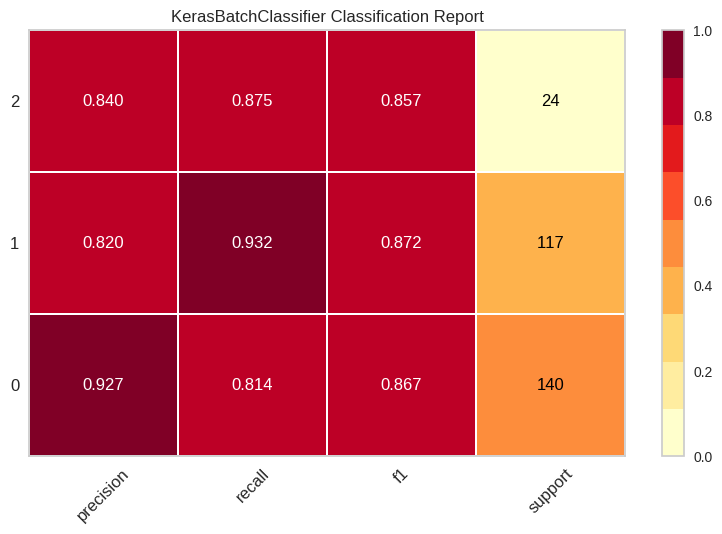

9/9 [==============================] - 0s 5ms/step - loss: 0.3356 - accuracy: 0.8683


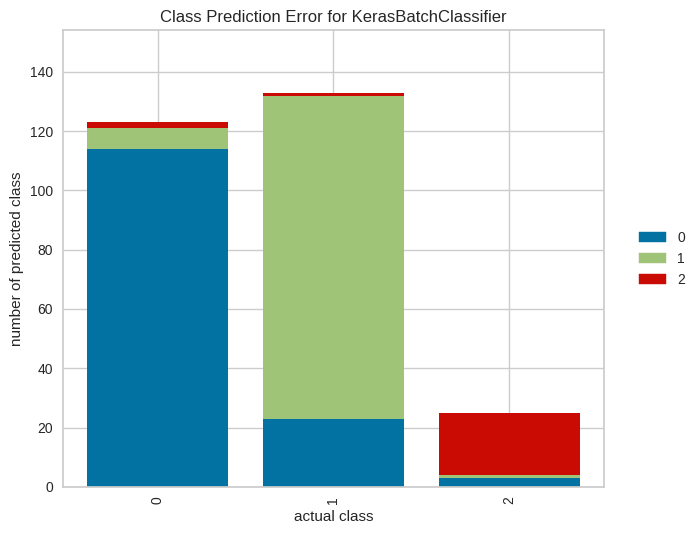

In [ ]:
classifier_metrics()
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz()]